In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [192]:
%cd D:\HDS\ปี 3 เทอม2\Image processing\Lecture 5

D:\HDS\ปี 3 เทอม2\Image processing\Lecture 5


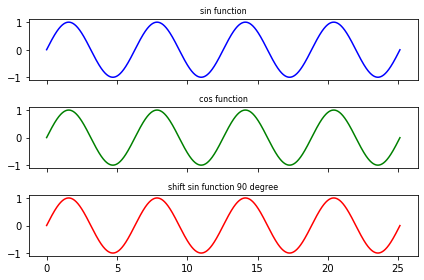

In [54]:
plt.close('all')

x = np.arange(0, 8*np.pi, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin((np.pi/2)-x)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y1, color = 'b')
ax1.set_title('sin function', fontsize = 8)
ax2.plot(x, y1, color = 'g')
ax2.set_title('cos function', fontsize = 8)
ax3.plot(x, y1, color = 'r')
ax3.set_title('shift sin function 90 degree', fontsize = 8)

#plt.show()
plt.tight_layout()

## Review 1D Fourier Series

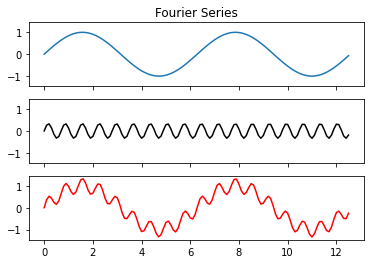

In [27]:
plt.close('all')

x = np.arange(0, 4*np.pi, 0.1)

y1 = np.sin(x)

y2 = (1/3)*np.sin(9*x)

y3 = y1+y2

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(x, y1)
ax1.set_title('Fourier Series')
ax2.plot(x, y2, color = 'black')
ax3.plot(x, y3, color = 'r')
plt.show()

## Review 1D Fourier Transforms

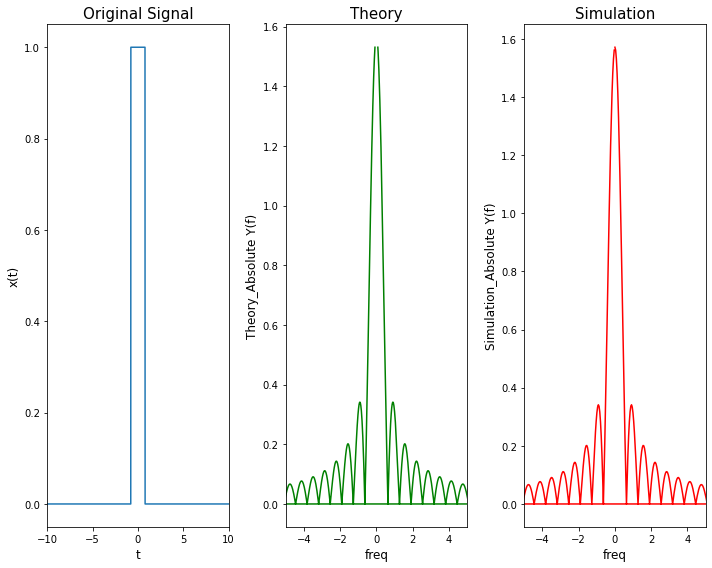

In [48]:
plt.close('all')

w = np.pi/2
a = 0
signal = []
scale = 0.0001

t = np.arange(-4*np.pi, 4*np.pi, scale)

for i in np.nditer(t):
    a = a+1
    if (i>= -w/2) and (i<= w/2):
        y = 1
    else:
        y = 0
    signal.append(y)

x = np.array(signal)

f_theory = 1/t
Y_theory = (w/(np.pi*w*(f_theory))*np.sin(np.pi*w*f_theory) )

dt = t[1] - t[0]
Y_simulation = np.fft.fft(x)
f_simulation = np.fft.fftfreq(x.size, d=dt)


fig = plt.figure(1, figsize = (10, 8), frameon = False)
ax1 = fig.add_subplot(131)
ax1.plot(t, x)
ax1.set_xlabel('t', fontsize=12)
ax1.set_ylabel('x(t)', fontsize=12)
ax1.set_title('Original Signal',fontsize = 15)
ax1.set_xlim(-10,10)

ax2 = fig.add_subplot(132)
ax2.plot(f_theory, np.abs(Y_theory),color='g')
ax2.set_xlabel('freq', fontsize=12)
ax2.set_ylabel('Theory_Absolute Y(f)', fontsize=12)
ax2.set_title('Theory',fontsize = 15)
ax2.set_xlim(-5,5)


ax3 = fig.add_subplot(133)
ax3.plot(f_simulation, np.abs(np.real(Y_simulation)*scale),color='r')
ax3.set_xlabel('freq', fontsize=12)
ax3.set_ylabel('Simulation_Absolute Y(f)', fontsize=12)
ax3.set_title('Simulation',fontsize = 15)
ax3.set_xlim(-5,5)

plt.tight_layout() #adjust colapse letters

## Plot 1D Fourier Transforms

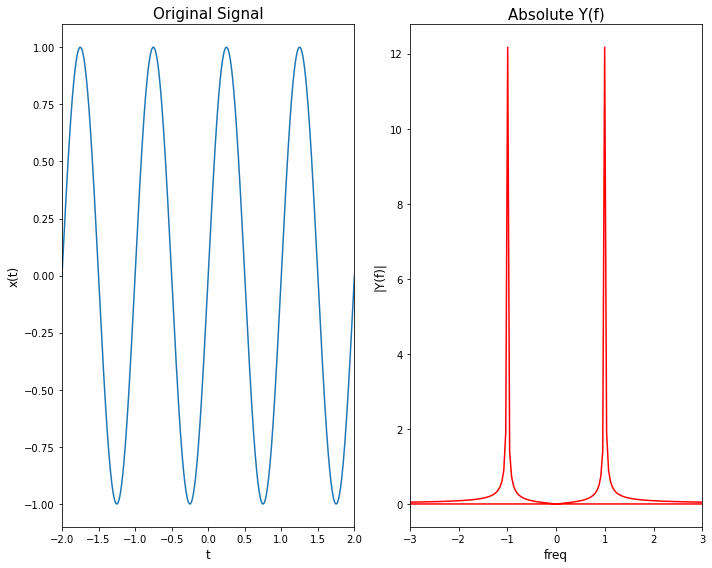

In [236]:
plt.close('all')

n = 1
scale = 0.001

t = np.arange(-4*np.pi, 4*np.pi, scale)

x = np.sin(2*np.pi*n*t)

dt = t[1] - t[0]
Y_simulation = np.fft.fft(x)
f_simulation = np.fft.fftfreq(x.size, d=dt)

fig = plt.figure(1, figsize = (10, 8), frameon = False)
ax1 = fig.add_subplot(121)
ax1.plot(t, x)
ax1.set_xlabel('t', fontsize=12)
ax1.set_ylabel('x(t)', fontsize=12)
ax1.set_title('Original Signal',fontsize = 15)
ax1.set_xlim(-2,2)

ax3 = fig.add_subplot(122)
ax3.plot(f_simulation, np.abs((Y_simulation)*scale),color='r')
ax3.set_xlabel('freq', fontsize=12)
ax3.set_ylabel('|Y(f)|', fontsize=12)
ax3.set_title('Absolute Y(f)',fontsize = 15)
ax3.set_xlim(-3,3)

plt.tight_layout()
#fig = plt.gcf()
#fig.set_size_inches(10.5, 4.5)

## 2D fourier transforms Sinusoidal Waves

### checker

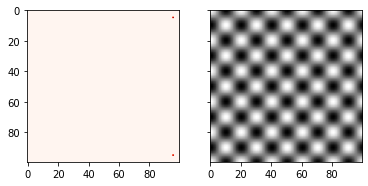

In [186]:
plt.close('all')

N = 100

f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[N-5, N-5] = 1
xf[5,N-5] = 1
Z = np.fft.ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.real(Z), cmap=cm.gray)
plt.show()

### Linear

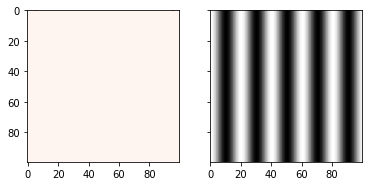

In [189]:
plt.close('all')

N = 100

f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0,N-5] = 1
Z = np.fft.ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.real(Z), cmap=cm.gray)
plt.show()

## Fourier transforms pairs

In [190]:
from mpl_toolkits.mplot3d import Axes3D

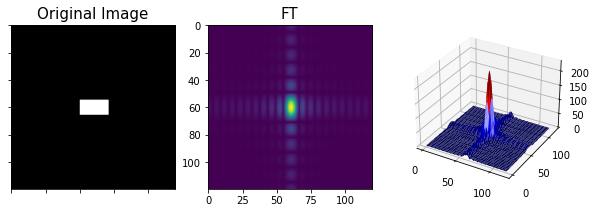

In [191]:
plt.close('all')

resx = 120
resy = 120
cx = resx/2
cy = resy/2

fxy = [[0 for x in range(resx)] for y in range(resy)]

for i in range(resx):
    for k in range(resy):
        if (k>=(cx-10)) and (k<=(cx+10)) and (i>=(cy-5)) and (i<=(cy+5)):
            fxy[i][k] = 1
        else:
            fxy[i][k] = 0

FS = np.fft.fftn(fxy)
fig = plt.figure(1, figsize = (10,8), frameon = False)
ax1 = fig.add_subplot(131)
ax1.imshow(fxy, cmap='gray')
ax1.set_title('Original Image',fontsize = 15)

ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2 = fig.add_subplot(132)
ax2.imshow((np.abs(np.fft.fftshift(FS))))
ax2.set_title('FT',fontsize = 15)

ax1.set_yticklabels([])
ax1.set_xticklabels([])


ax3 = fig.add_subplot(133, projection='3d')
X= np.arange(0, 120, 1)
Y= np.arange(0, 120, 1)
X,Y = np.meshgrid(X, Y)
surf = ax3.plot_surface(X, Y, (np.abs(np.fft.fftshift(FS))),cmap = 'seismic')

plt.show()

## Frequency Domain processing

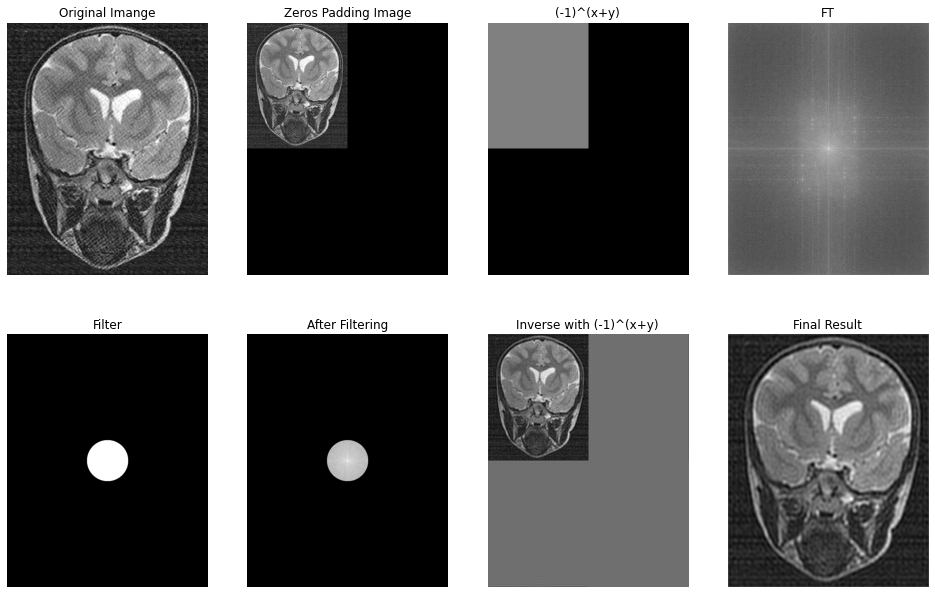

In [240]:
import cv2
import math

im = cv2.imread('brain.png',0)

# Add zeroes padding with (-1)^x+y
nim = np.zeros((2*im.shape[0], 2*im.shape[1]), dtype = im.dtype)
bnim = np.zeros((2*im.shape[0], 2*im.shape[1]), dtype = im.dtype)

for i in range(im.shape[0]):
    for k in range(im.shape[1]):
        nim[i][k] = im[i][k]
        bnim[i][k] = ((-1)**(i+k))*im[i][k]
        
FS = np.fft.fft2(bnim)

# Create a filter to keep low frequency, example a dish image in frequency domain
filt = np.zeros((2*im.shape[0], 2*im.shape[1]), dtype = im.dtype)
center = (im.shape[1], im.shape[0])
radius = 100
cv2.circle(filt, center, radius, (255,255,255),-1)

G = filt*FS

#inverse fourier transforms
gt = np.real(np.fft.ifftn(G))

for i in range(gt.shape[0]):
    for k in range(gt.shape[1]):
        gt[i][k] = ((-1)**(i+k)) * gt[i][k]
#print(gt)
#print(im.shape[0],im.shape[1])

final = np.zeros((im.shape[0], im.shape[1]), dtype = gt.dtype)

for i in range(final.shape[0]):
    for k in range(final.shape[1]):
        final[i][k] = gt[i][k]
        
plt.subplot(241)
plt.imshow(im,'gray')
plt.title('Original Imange', fontsize=12)
plt.axis('off')

plt.subplot(242)
plt.imshow(nim,'gray')
plt.title('Zeros Padding Image', fontsize=12)
plt.axis('off')

plt.subplot(243)
plt.imshow(bnim,'gray')
plt.title('(-1)^(x+y)', fontsize=12)
plt.axis('off')

plt.subplot(244)
plt.imshow(20*np.log(np.abs(FS)),'gray')
plt.title('FT', fontsize=12)
plt.axis('off')

plt.subplot(245)
plt.imshow(filt,'gray')
plt.title('Filter', fontsize=12)
plt.axis('off')

plt.subplot(246)
plt.imshow(20*np.log(np.abs(G)+1),'gray')
plt.title('After Filtering', fontsize = 12)
plt.axis('off')

plt.subplot(247)
plt.imshow(gt,'gray')
plt.title('Inverse with (-1)^(x+y)', fontsize = 12)
plt.axis('off')

plt.subplot(248)
plt.imshow(final,'gray')
plt.title('Final Result',fontsize=12)
plt.axis('off')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(16.5, 10.5) # set image size